In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df1 = pd.read_csv('Leads.csv')

In [3]:
df =df1.copy()

In [4]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Metadata checks

In [5]:
#checking for shape
df.shape

(9240, 37)

In [6]:
#checking the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Checking for Null and Duplicates

In [8]:
#checking for duplicates
df.duplicated().sum()

0

### There are no duplicates

In [9]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Converting 'Select' values to NaN.
df.replace('Select', np.nan, inplace=True)

In [11]:
#finding the null pct
missing_pct = ((df.isna().sum())*100/len(df))
missing_pct.sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

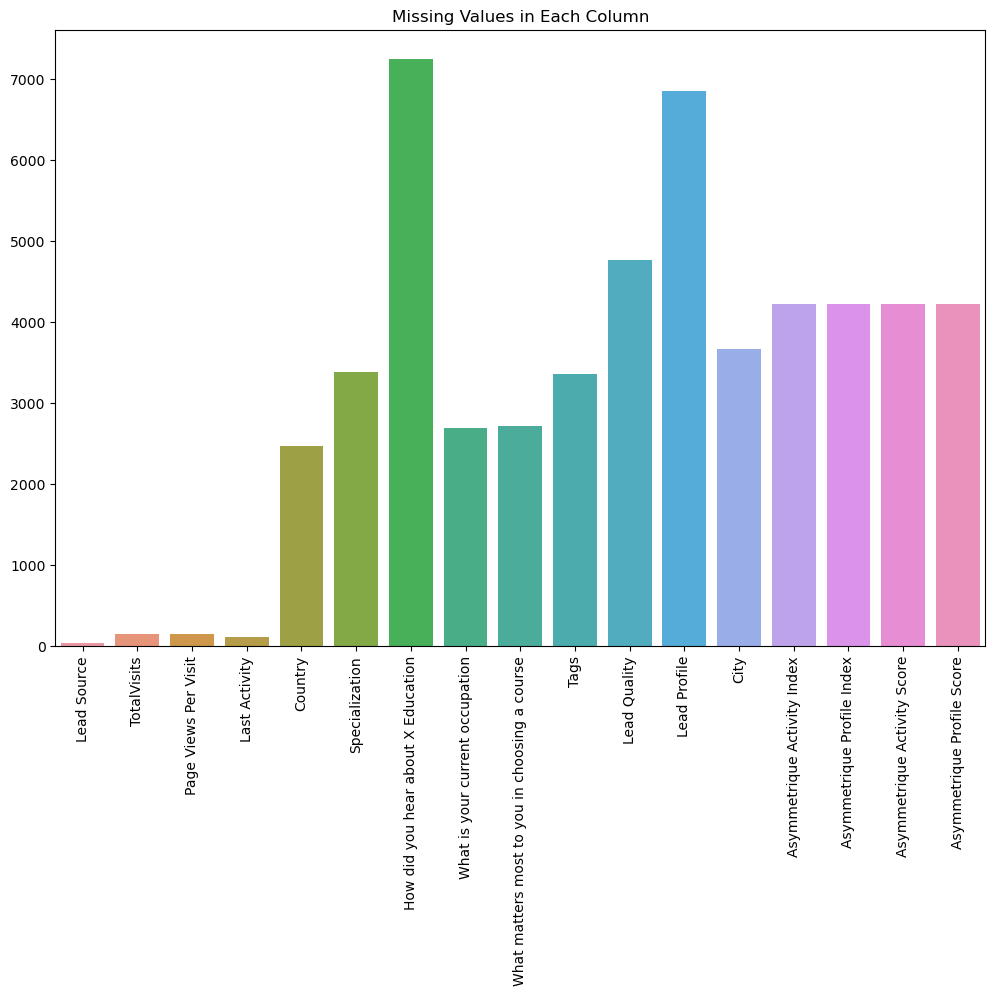

In [12]:
# we can see that the pct of null values > 45% can be dropped as the cols are not significant
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values in Each Column")
plt.show()

In [13]:
# dropping the null values
cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [14]:
missing_pct = ((df.isna().sum())*100/len(df))
missing_pct.sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

Now we have Dropped the null cols with value more than 45%

### List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot distribution of each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x = col, data = df, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()

In [15]:
#
df.head(2)

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   

  Receive More Updates About Our Courses                         Tags  \
0                                     No  Interested in other courses   
1                                     No                      Ringing   

  Update me on Supply Chain Content Get updates on DM Content City  \
0                                No                        No  NaN   
1                                No                        No  NaN   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  

[2 rows x 30 columns]

In [16]:
#dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [17]:
df.head(2)

Lead Origin     Lead Source Do Not Email Do Not Call  Converted  \
0         API      Olark Chat           No          No          0   
1         API  Organic Search           No          No          0   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   

             Last Activity Country  ... Digital Advertisement  \
0  Page Visited on Website     NaN  ...                    No   
1             Email Opened   India  ...                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   

                          Tags Update me on Supply Chain Content  \
0  Interested in other courses                                No   
1                      Ringing                                No   

  Get updates on DM Content City I agree to pay the amount through cheque  \
0                        No  NaN                                       No   
1                        No  NaN                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  

[2 rows x 28 columns]

In [18]:
def count_plot(col):
    plt.figure(figsize=(15,5))
    s1=sns.countplot(data = df , x = col, hue=df.Converted)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

### Analysing Country

In [19]:
#checking the value counts of country
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [20]:
# as we can see the country col is biased to india so we can drop the country col
cols_drop = ['Country']

### Analysing City

In [21]:
#checking the city
df['City'].value_counts(dropna =False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Based on the observation the majority of the users are from Mumbai and its outskirts , so we are replacing nan with Mumbai

In [22]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

In [23]:
df['City'].value_counts(dropna =False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

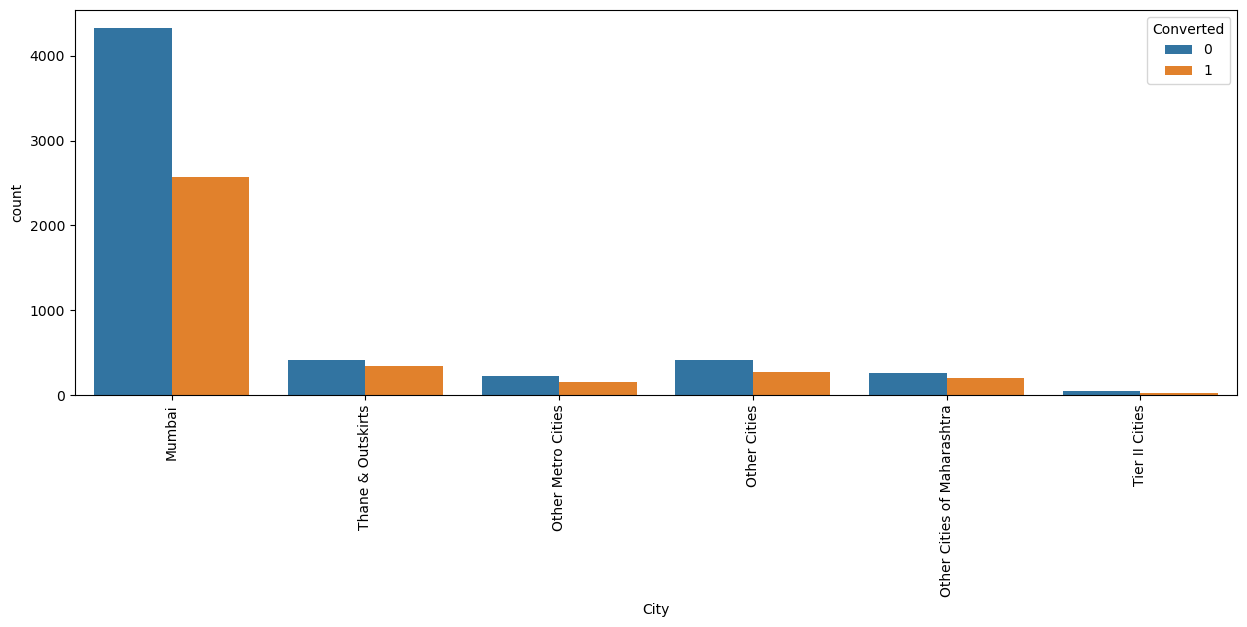

In [24]:
count_plot('City')

In [25]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### defining count function

In [26]:
# defining count function for usability
def count(col):
    return df[col].value_counts(dropna = False)

### Analysing Specialization

In [27]:
count('Specialization')

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
# there are some leads who have not specified any specialization it is either they havent chosen yet or they are not sure what to take 
# so we can fill these null values by 'Not specified'

df['Specialization'] = df['Specialization'].replace(np.nan,'Not specified')

In [29]:
count('Specialization')

Not specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Based on the previous graph we can see that all the managements show a similar trtend , so we are combining then to one 

In [30]:
df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Studies')  

In [31]:
count('Specialization')

Management_Studies                   4253
Not specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

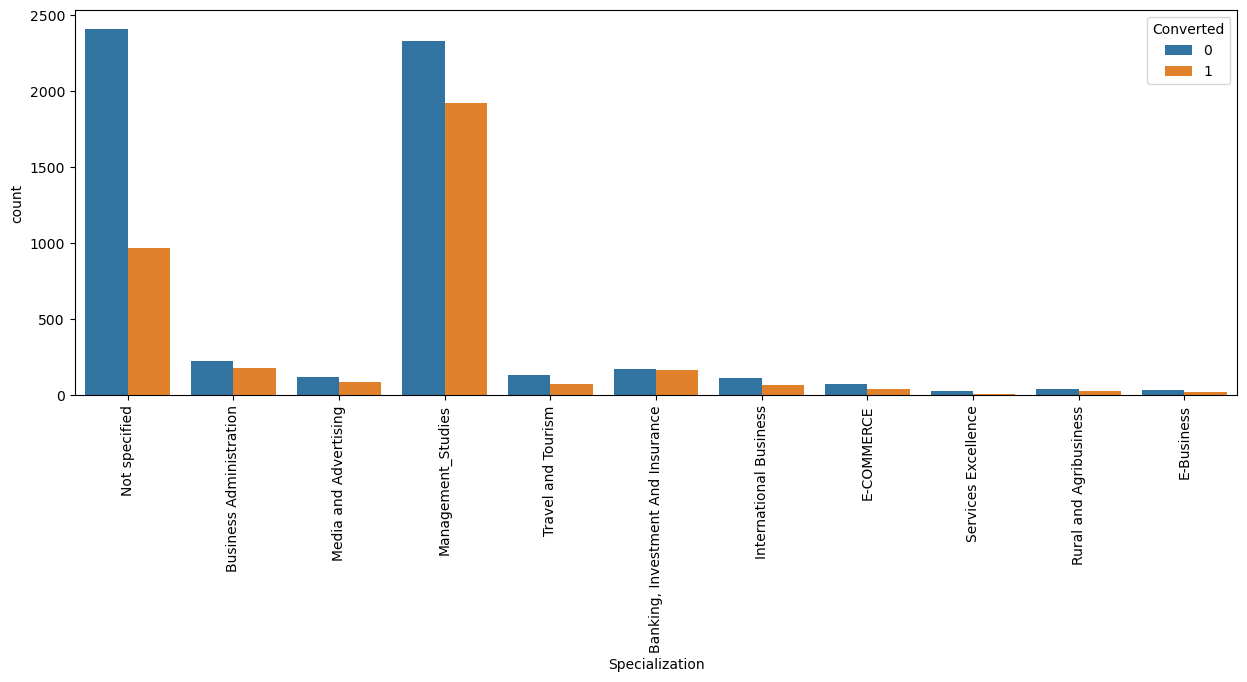

In [32]:
count_plot('Specialization')

### Analysing 'What is your current occupation'

In [33]:
# analysing 'What is your current occupation'
count('What is your current occupation')

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
df['What is your current occupation'].mode()

0    Unemployed
Name: What is your current occupation, dtype: object

In [35]:
# filling the null with model

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [36]:
count('What is your current occupation')

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

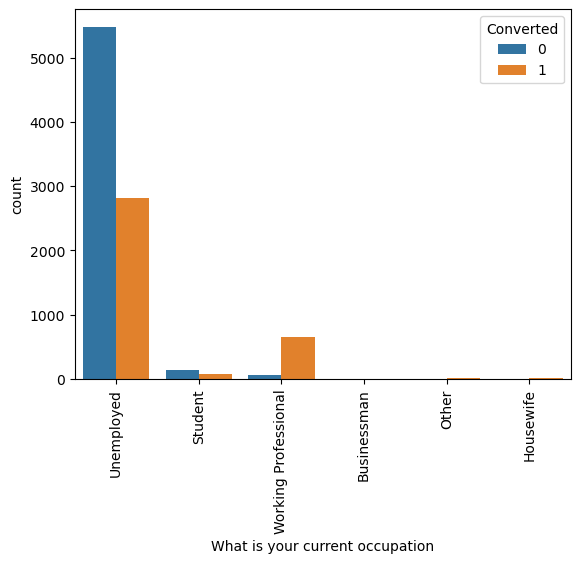

In [37]:
#visualizing count of Variable based on Converted value
s1=sns.countplot(data = df, x = 'What is your current occupation', hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Unemployed persons have high in overall count
- Working Professional;s have higher conversion rate

### analysing 'What matters most to you in choosing a course'

In [38]:
count('What matters most to you in choosing a course')

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
#replacing Nan values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

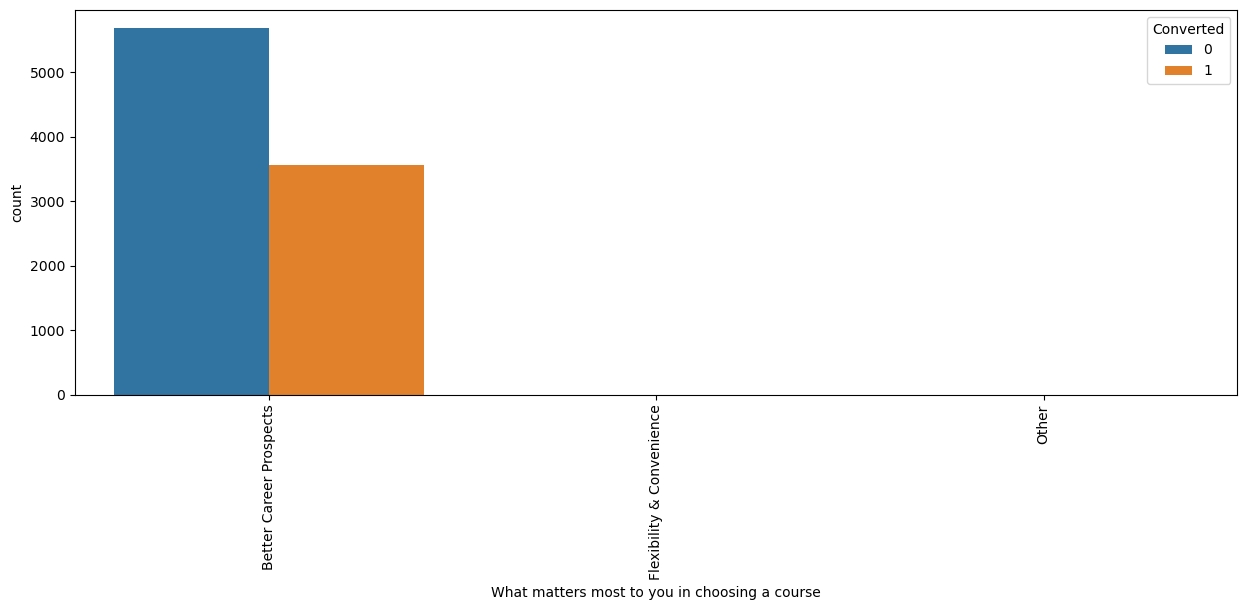

In [40]:
#visualizing count of Variable based on Converted value
count_plot('What matters most to you in choosing a course')

In [41]:
#this col does not hold any significance so we can drop the col
cols_drop.append('What matters most to you in choosing a course')

In [42]:
count('Tags')

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [43]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

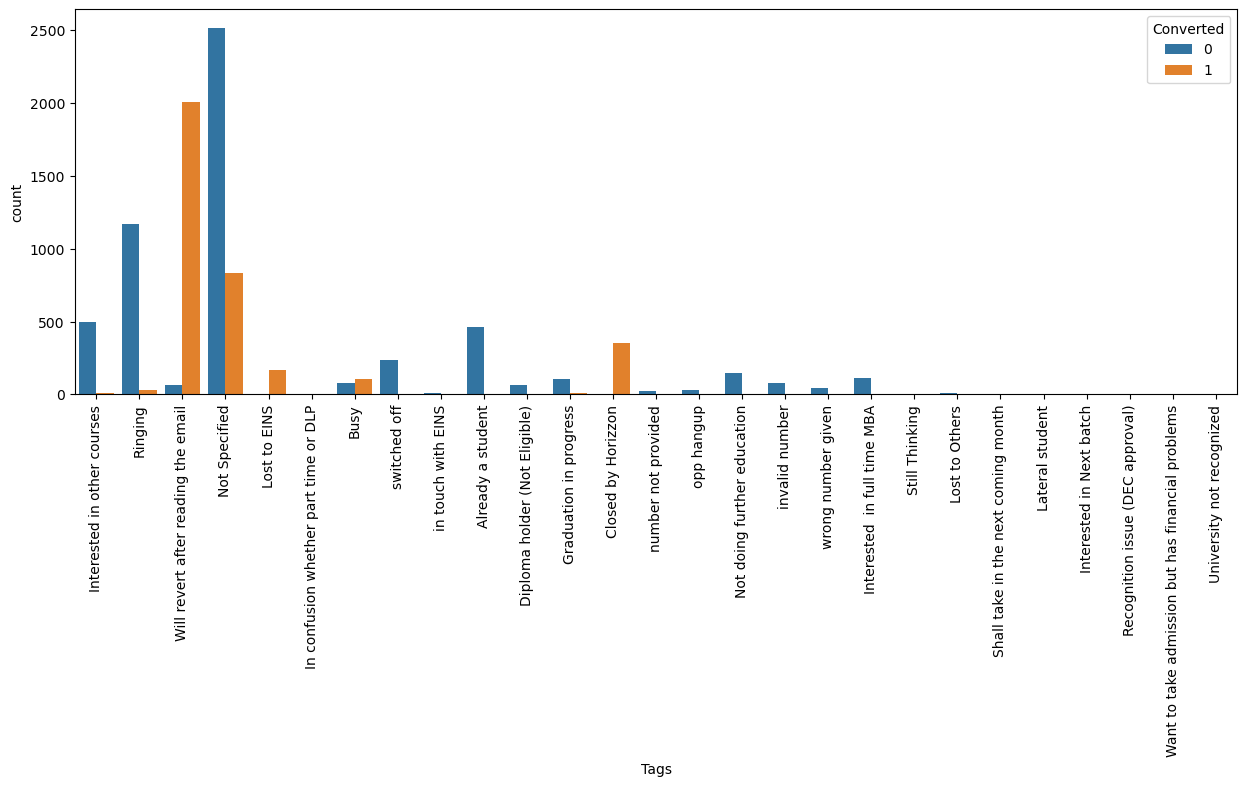

In [44]:
count_plot('Tags')

there are too many tags with low count, which can be clubbed into other tags

In [45]:
#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [46]:
count('Tags')

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [47]:
# againchecking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Analysing 'Lead Source'

In [48]:
count('Lead Source')

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [49]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

In [50]:
count('Lead Source')

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

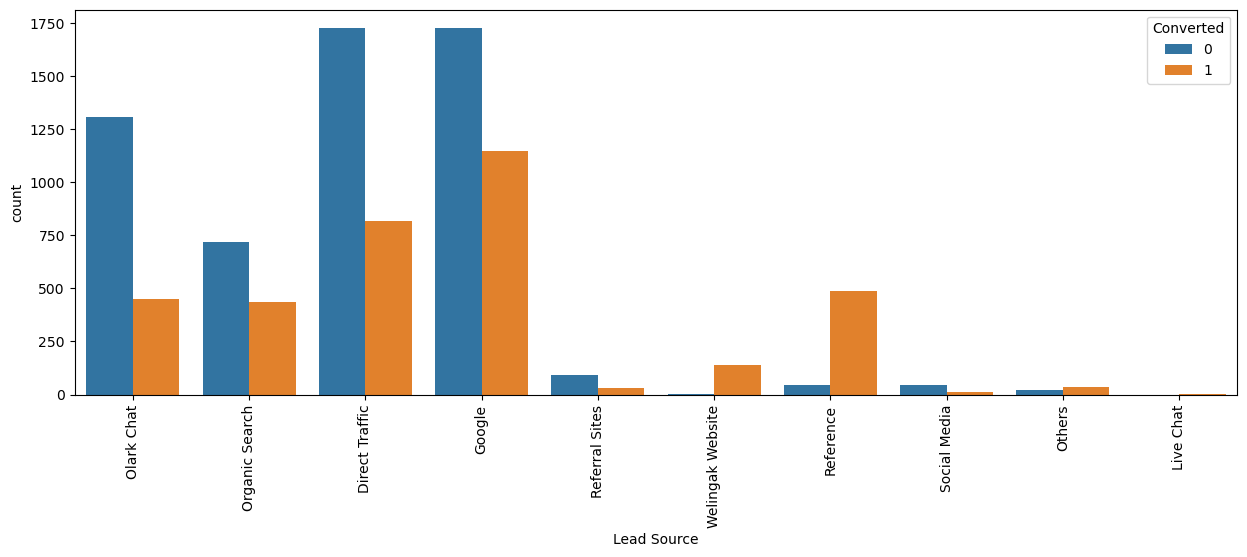

In [51]:
count_plot('Lead Source')

### Obsevations 
1. Maximum number of leads are generated by Google and Direct traffic.
2. Conversion Rate of reference leads and leads through welingak website is high.
3. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

##### Analysing 'Lead Origin'

In [52]:
count('Lead Origin')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

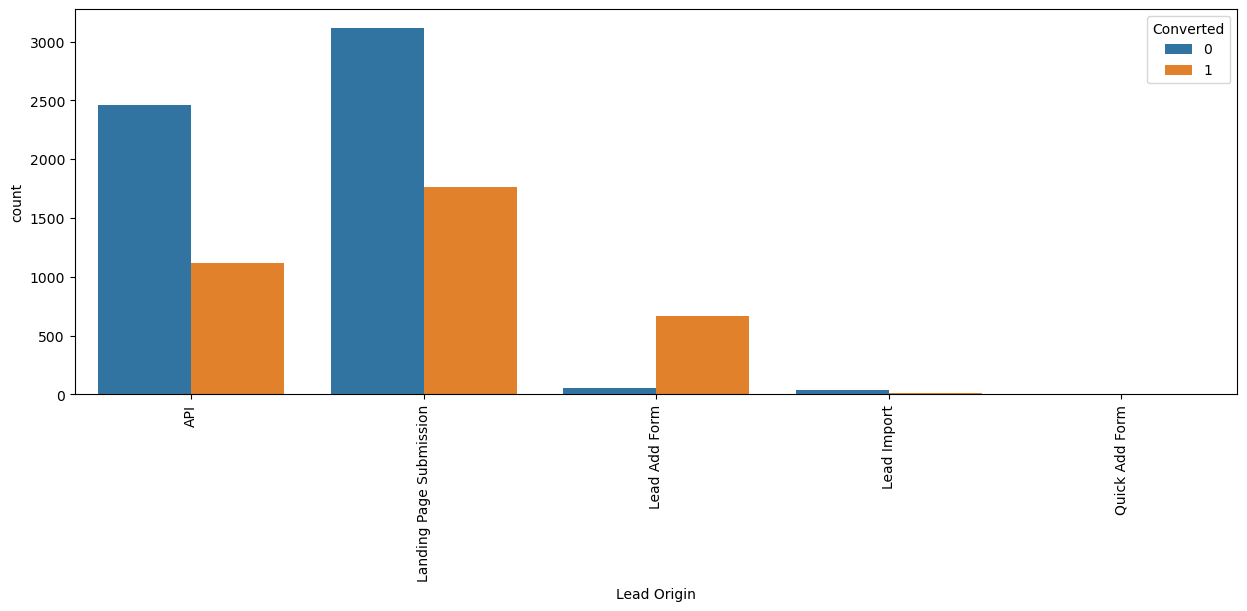

In [53]:
count_plot('Lead Origin')

### Observaions

1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import and Quick Add Form get very few leads.
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

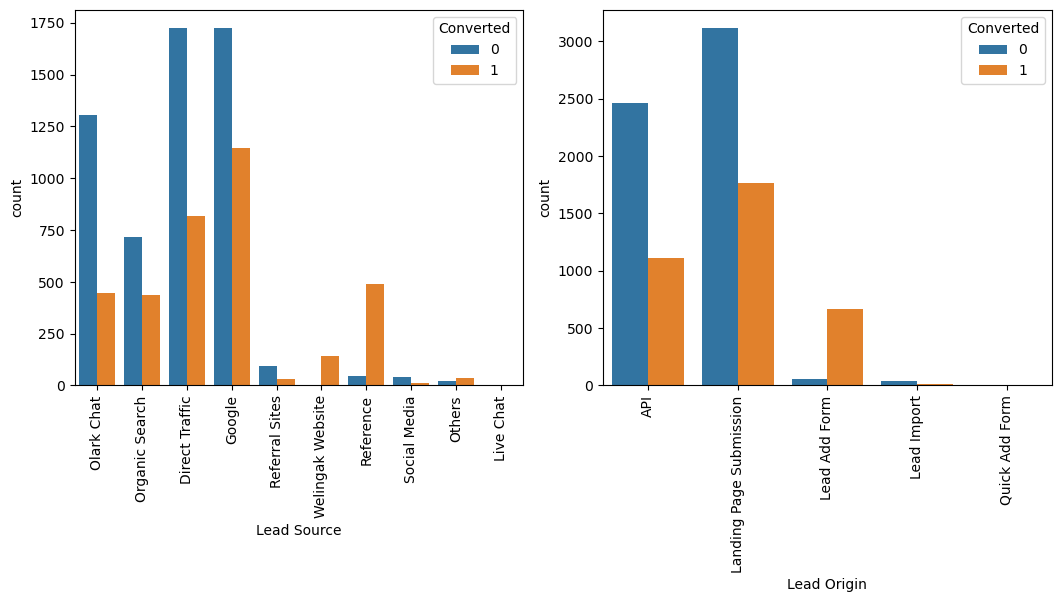

In [54]:
fig=plt.subplots(figsize=(16, 16))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 6.0)
    sns.countplot(x=feature, hue="Converted",data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

### **OBSERVATION:**
- Despite having a relatively lower conversion rate of approximately 30%, both API and Landing Page Submission generate a substantial number of leads.
- Conversely, the Lead Add Form generates a significantly lower count of leads, yet boasts a notably high conversion rate.
- Lead Import contributes negligibly to both lead count and conversion rate and can be disregarded.
- To enhance the overall lead conversion rate, efforts should be directed towards improving the conversion rates of API and Landing Page Submission, while simultaneously increasing lead generation.Form'**

##### analysing  Last Activity:


In [55]:
count('Last Activity')

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

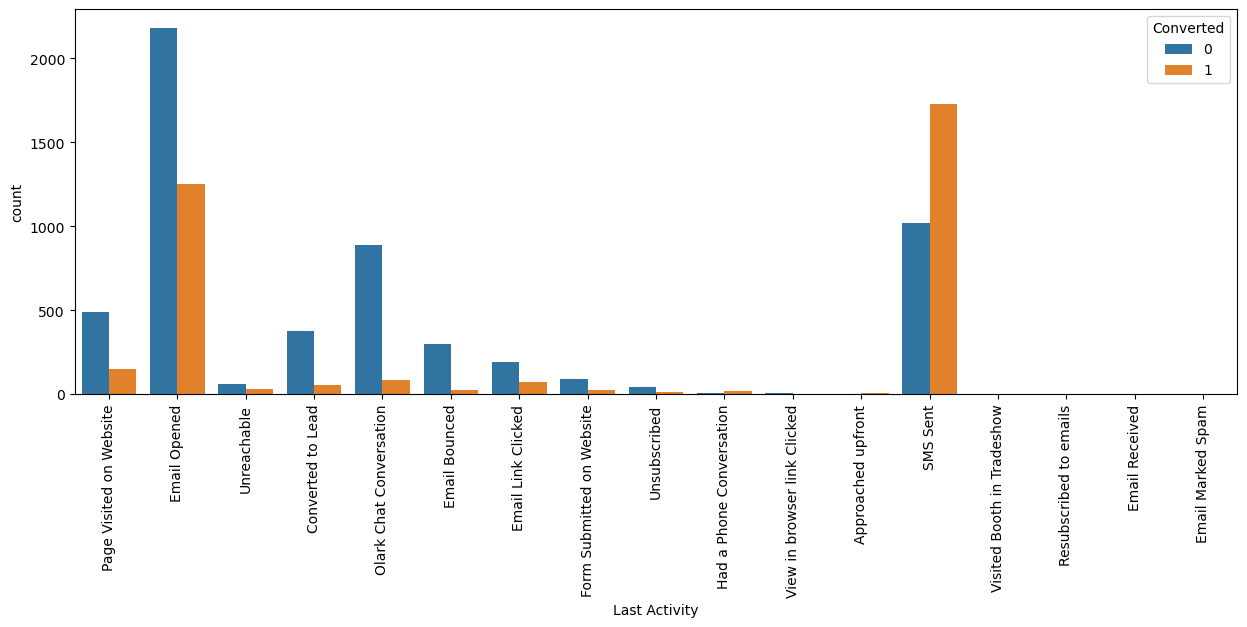

In [56]:
count_plot('Last Activity')

### **OBSERVATION:**

- The highest count among last activities is recorded for "Email Opened".
- 
The maximum conversion rate is observed for the last activity being "SMS Sent".

**We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent**-"

In [57]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [58]:
count('Last Activity')

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [59]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [60]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [61]:
#Checking percentage of Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

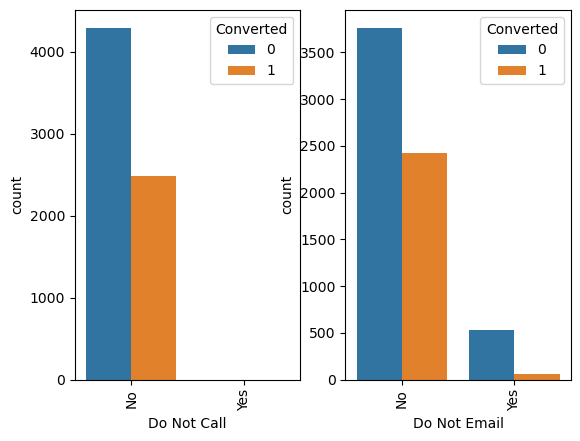

In [62]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

# Subplot for 'Do Not Call'
ax1 = plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Do Not Call', hue='Converted', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Subplot for 'Do Not Email'
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Do Not Email', hue='Converted', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

In [63]:
count('Do Not Call')

No     6778
Yes       1
Name: Do Not Call, dtype: int64

In [64]:
count('Do Not Email')

No     6186
Yes     593
Name: Do Not Email, dtype: int64

Do Not Call the cols have only No col which is not significant in the analysis so we can drop 

In [65]:
cols_drop.append('Do Not Email')

In [66]:
cols_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Email']

Analysing the imbalance cols

In [67]:
count('Search')

No     6765
Yes      14
Name: Search, dtype: int64

In [68]:
count('Magazine')

No    6779
Name: Magazine, dtype: int64

In [69]:
count('Newspaper Article')

No     6777
Yes       2
Name: Newspaper Article, dtype: int64

In [70]:
count('X Education Forums')

No     6778
Yes       1
Name: X Education Forums, dtype: int64

In [71]:
count('Newspaper')

No     6778
Yes       1
Name: Newspaper, dtype: int64

In [72]:
count('Digital Advertisement')

No     6775
Yes       4
Name: Digital Advertisement, dtype: int64

In [73]:
count('Through Recommendations')

No     6772
Yes       7
Name: Through Recommendations, dtype: int64

In [74]:
count('Receive More Updates About Our Courses')

No    6779
Name: Receive More Updates About Our Courses, dtype: int64

In [75]:
count('Update me on Supply Chain Content')

No    6779
Name: Update me on Supply Chain Content, dtype: int64

In [76]:
count('Get updates on DM Content')

No    6779
Name: Get updates on DM Content, dtype: int64

In [77]:
count('I agree to pay the amount through cheque')

No    6779
Name: I agree to pay the amount through cheque, dtype: int64

In [78]:
count('A free copy of Mastering The Interview')

No     3913
Yes    2866
Name: A free copy of Mastering The Interview, dtype: int64

In [79]:
#adding imbalanced columns to the list of columns to be dropped

cols_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

##### 'Last Notable Activity

In [80]:
count('Last Notable Activity')

Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [81]:
#clubbing lower frequency values
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

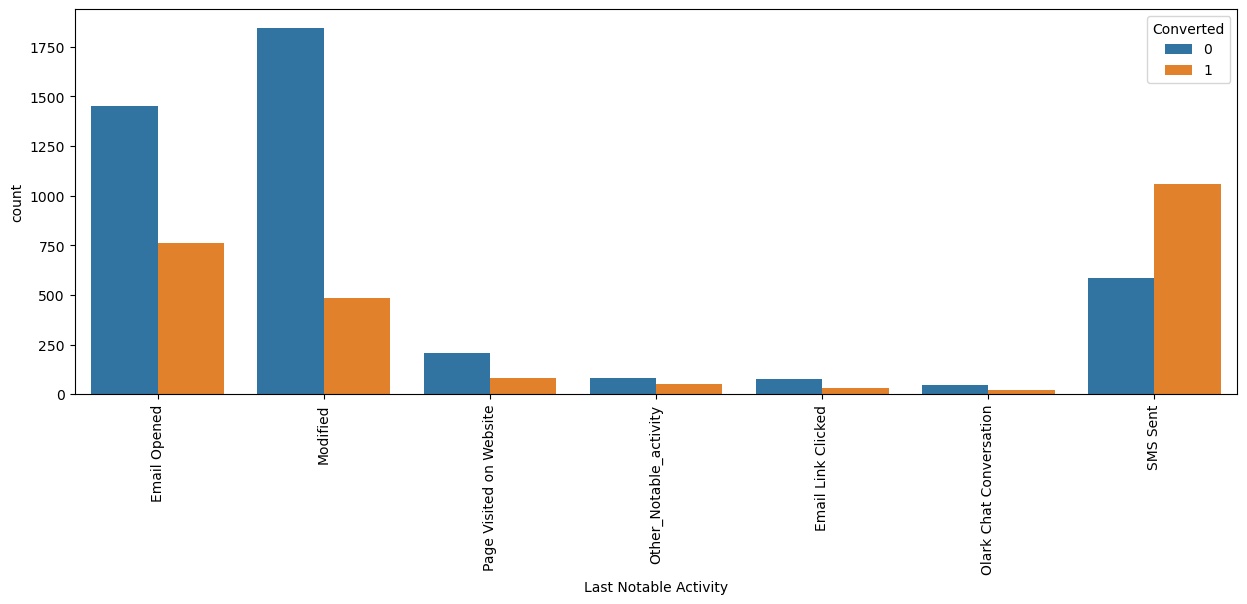

In [82]:
count_plot('Last Notable Activity')

In [83]:
count('Last Notable Activity')

Modified                   2331
Email Opened               2212
SMS Sent                   1643
Page Visited on Website     286
Other_Notable_activity      133
Email Link Clicked          106
Olark Chat Conversation      68
Name: Last Notable Activity, dtype: int64

##### Dropping the previously analysed not significant cols

In [84]:
cols_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Email',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [85]:
df = df.drop(cols_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Call                             6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   obje

In [86]:
#Checking the imbalance ratio of the converted

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

36.65732408909869

#### Plotting the correlation 

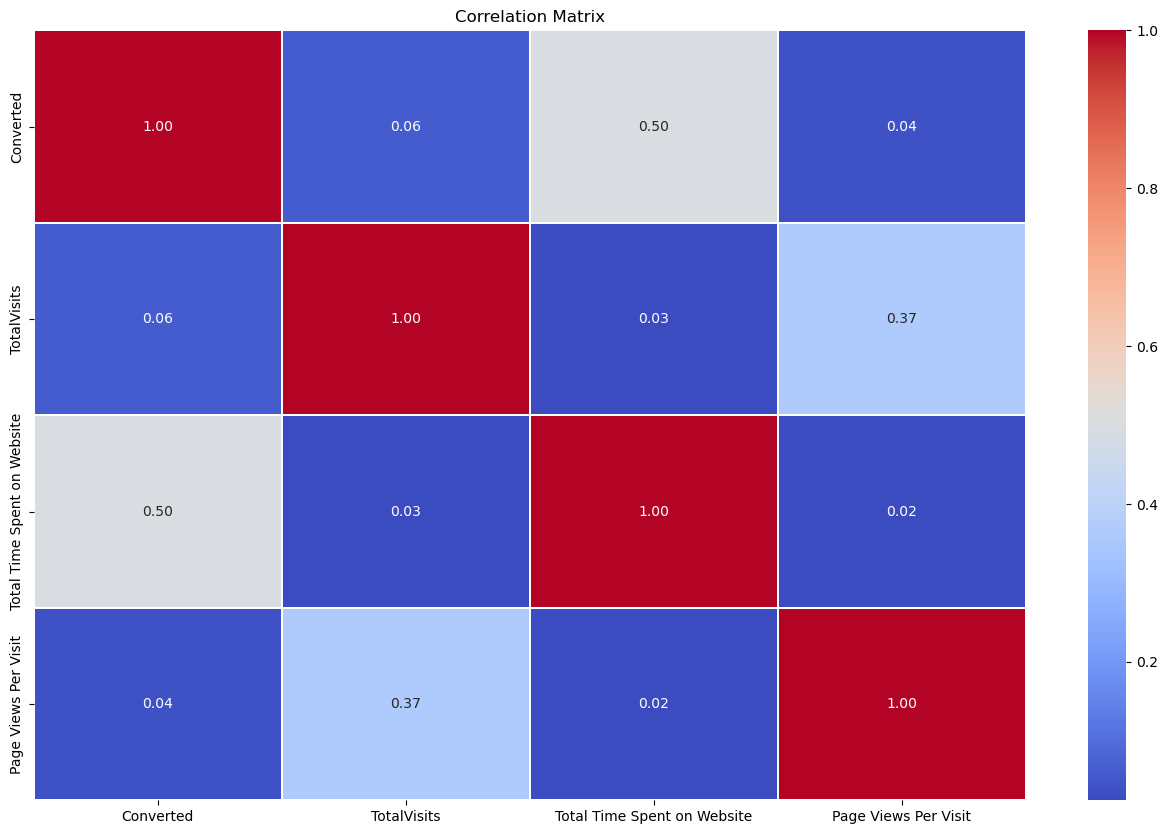

In [87]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

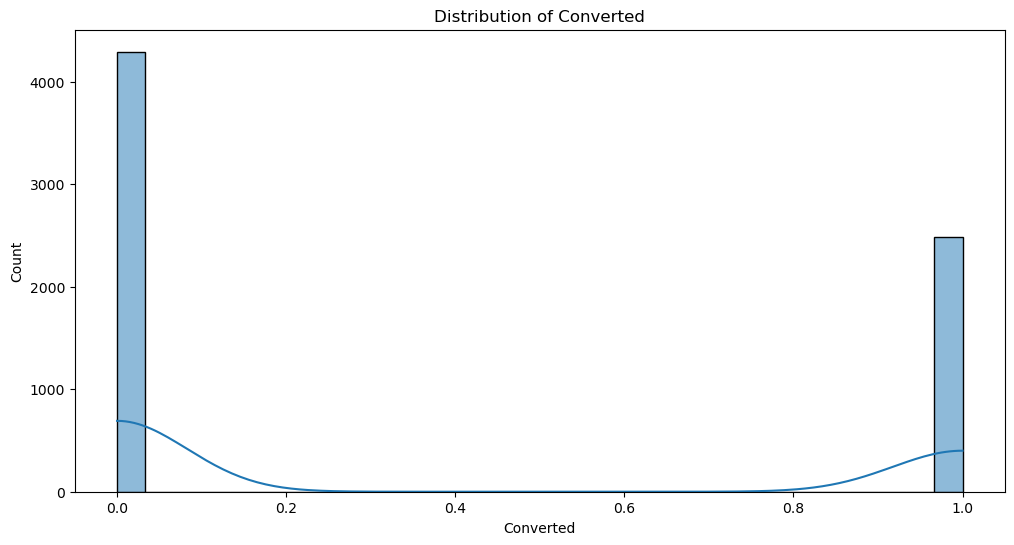

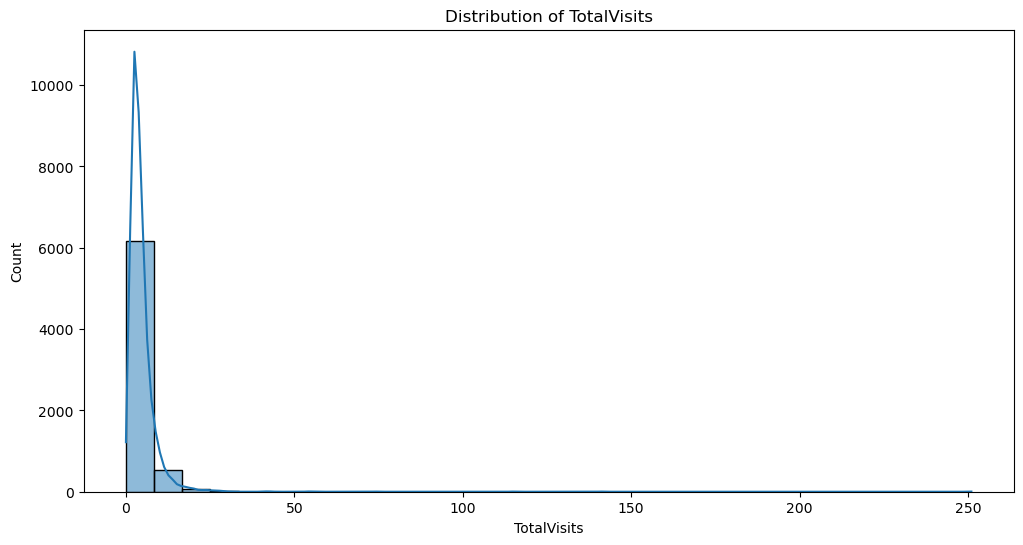

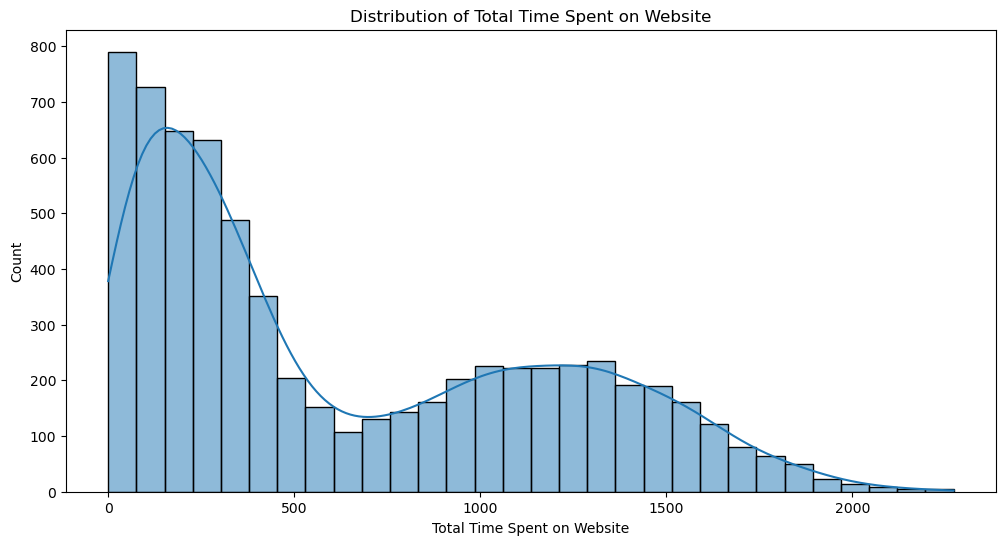

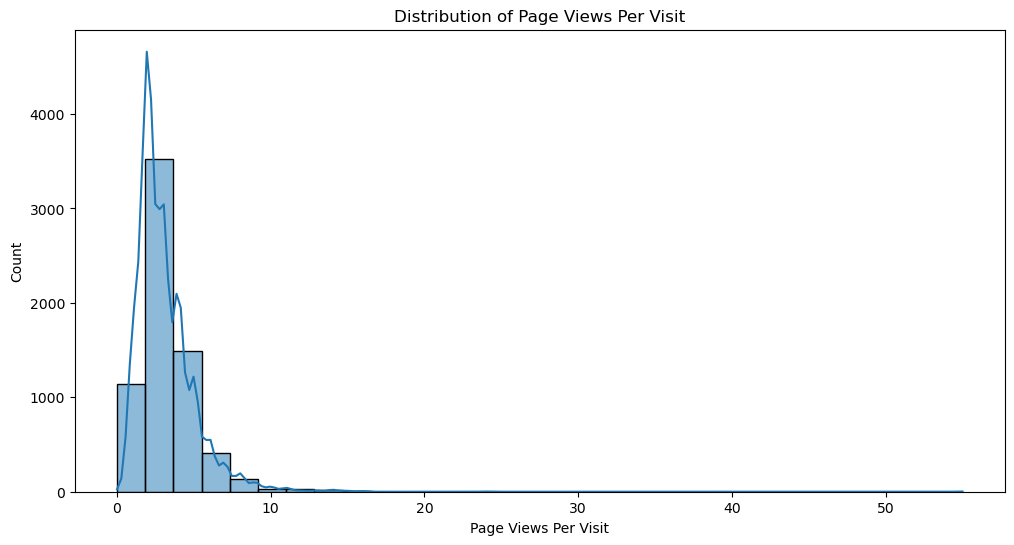

In [88]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Plot distribution of each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(data= df , x = col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Observations:

1. Leads spending more time on the website are more likely to be converted.
2. Website should be made more engaging to make leads spend more time.
3. Nothing can be said specifically for lead conversion from Page Views Per Visit


### Creating dummy variables

In [89]:
df.head()

Lead Origin     Lead Source Do Not Call  Converted  \
1                      API  Organic Search          No          0   
2  Landing Page Submission  Direct Traffic          No          1   
3  Landing Page Submission  Direct Traffic          No          0   
4  Landing Page Submission          Google          No          1   
6  Landing Page Submission          Google          No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   
6          2.0                         1640                   2.0   

       Last Activity           Specialization What is your current occupation  \
1       Email Opened            Not specified                      Unemployed   
2       Email Opened  Business Administration                         Student   
3             Others    Media and Advertising                      Unemployed   
4  Converted to Lead            Not specified                      Unemployed   
6       Email Opened       Management_Studies                      Unemployed   

                                  Tags    City  \
1                              Ringing  Mumbai   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   
6  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  
6                                     No              Modified

In [90]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [91]:
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [92]:
df = pd.get_dummies(data = df, columns =categorical_cols,drop_first =True )

In [93]:
df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   
6          1          2.0                         1640                   2.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   
6                                    1                          0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   
6                   1                       0                           0   

   Lead Source_Others  ...  City_Other Metro Cities  City_Thane & Outskirts  \
1                   0  ...                        0                       0   
2                   0  ...                        0                       0   
3                   0  ...                        0                       0   
4                   0  ...                        0                       0   
6                   0  ...                        0                       0   

   City_Tier II Cities  A free copy of Mastering The Interview_Yes  \
1                    0                                           0   
2                    0                                           1   
3                    0                                           0   
4                    0                                           0   
6                    0                                           0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   
6                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
1                                              0   
2                                              0   
3                                              0   
4                                              0   
6                                              0   

   Last Notable Activity_Other_Notable_activity  \
1                                             0   
2                                             0   
3                                             0   
4                                             0   
6                                             0   

   Last Notable Activity_Page Visited on Website  \
1                                              0   
2                                              0   
3                                              0   
4                                              0   
6                                              0   

   Last Notable Activity_SMS Sent  
1                               0  
2                               0  
3                               0  
4                               0  
6                               0  

[5 rows x 57 columns]

### Train test split

In [94]:
#splitting X,y

y = df.pop('Converted')

X = df

In [95]:
X

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1             5.0                          674                  2.50   
2             2.0                         1532                  2.00   
3             1.0                          305                  1.00   
4             2.0                         1428                  1.00   
6             2.0                         1640                  2.00   
...           ...                          ...                   ...   
9235          8.0                         1845                  2.67   
9236          2.0                          238                  2.00   
9237          2.0                          199                  2.00   
9238          3.0                          499                  3.00   
9239          6.0                         1279                  3.00   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1                                       0                          0   
2                                       1                          0   
3                                       1                          0   
4                                       1                          0   
6                                       1                          0   
...                                   ...                        ...   
9235                                    1                          0   
9236                                    1                          0   
9237                                    1                          0   
9238                                    1                          0   
9239                                    1                          0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      1                       0                           0   
6                      1                       0                           0   
...                  ...                     ...                         ...   
9235                   0                       0                           0   
9236                   0                       0                           0   
9237                   0                       0                           0   
9238                   1                       0                           0   
9239                   0                       0                           0   

      Lead Source_Others  Lead Source_Reference  ...  City_Other Metro Cities  \
1                      0                      0  ...                        0   
2                      0                      0  ...                        0   
3                      0                      0  ...                        0   
4                      0                      0  ...                        0   
6                      0                      0  ...                        0   
...                  ...                    ...  ...                      ...   
9235                   0                      0  ...                        0   
9236                   0                      0  ...                        0   
9237                   0                      0  ...                        0   
9238                   0                      0  ...                        1   
9239                   0                      0  ...                        0   

      City_Thane & Outskirts  City_Tier II Cities  \
1                          0                    0   
2                          0                    0   
3                          0                    0   
4                          0                    0   
6                          0                    0   
...                     

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =100)

In [97]:
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6071    -0.367437                     0.112425             -0.871989   
5188    -0.860574                    -0.400158             -1.142037   
1180    -0.367437                    -0.698857             -0.871989   
5563    -0.614005                     0.379779             -0.601941   
6006     0.372269                    -0.503412              1.558439   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6071                                    0                          0   
5188                                    0                          0   
1180                                    1                          0   
5563                                    1                          0   
6006                                    1                          0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
6071                   1                       0                           0   
5188                   1                       0                           0   
1180                   0                       0                           0   
5563                   1                       0                           0   
6006                   0                       0                           1   

      Lead Source_Others  Lead Source_Reference  ...  City_Other Metro Cities  \
6071                   0                      0  ...                        0   
5188                   0                      0  ...                        0   
1180                   0                      0  ...                        1   
5563                   0                      0  ...                        0   
6006                   0                      0  ...                        0   

      City_Thane & Outskirts  City_Tier II Cities  \
6071                       0                    0   
5188                       0                    0   
1180                       0                    0   
5563                       0                    0   
6006                       0                    0   

      A free copy of Mastering The Interview_Yes  \
6071                                           0   
5188                                           0   
1180                                           1   
5563                                           0   
6006                                           1   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
6071                                   0                               1   
5188                                   0                               1   
1180                                   0                               0   
5563                                   0                               1   
6006                                   0                               1   

      Last Notable Activity_Olark Chat Conversation  \
6071                                              0   
5188                                              0   
1180                                              0   
5563                                              0   
6006                                              0   

      Last Notable Activity_Other_Notable_activity  \
6071                                             0   
5188                                             0   
1180                                             0   
5563                                             0   
6006                                             0   

      Last Notable Activity_Page Visited on Website  \
6071                                              0   
5188                                              0   
1180                                              0   
5563                                              0   
6006                                              0   

      Last Notable Activity_SMS Sent  
6071                               0  
5188              

### Model building with RFE

In [98]:
logreg = LogisticRegression()


rfe = RFE(estimator=logreg, n_features_to_select=15)            # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True])

In [100]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Other_Tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [101]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Do Not Call_Yes', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Studies',
       'Specialization_Media and Advertising', 'Specialization_Not specified',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your curren

### Model1

In [102]:
X_train = X_train[col]
X_test = X_test[col]

In [103]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [104]:
lgm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
lgm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4729
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -907.47
Date:                Sun, 19 May 2024   Deviance:                       1814.9
Time:                        23:09:22   Pearson chi2:                 6.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4897      0.249     -1.971      0.049      -0.977      -0.003
Total Time Spent on Website                  1.1343      0.064     17.736      0.000       1.009       1.260
Lead Origin_Lead Add Form                   19.4771   1.92e+04      0.001      0.999   -3.76e+04    3.76e+04
Lead Source_Welingak Website                 4.7653    3.6e+04      0.000      1.000   -7.06e+04    7.06e+04
Last Activity_Email Bounced                 -1.2988      0.568     -2.286      0.022      -2.412      -0.185
Last Activity_SMS Sent                       0.8817      0.252      3.501      0.000       0.388       1.375
What is your current occupation_Student     -0.5772      0.729     -0.792      0.429      -2.007       0.852
Tags_Closed by Horizzon                      5.4265      1.046      5.190      0.000       3.377       7.476
Tags_Interested in other courses            -2.9543      0.491     -6.019      0.000      -3.916      -1.992
Tags_Lost to EINS                            4.1144      0.655      6.280      0.000       2.830       5.399
Tags_Not Specified                          -0.9830      0.245     -4.011      0.000      -1.463      -0.503
Tags_Other_Tags                             -3.5666      0.331    -10.759      0.000      -4.216      -2.917
Tags_Ringing                                -4.5208      0.356    -12.714      0.000      -5.218      -3.824
Tags_Will revert after reading the email     3.4997      0.299     11.687      0.000       2.913       4.087
Last Notable Activity_Modified              -0.9454      0.176     -5.361      0.000      -1.291      -0.600
Last Notable Activity_SMS Sent               1.1239      0.293      3.836      0.000       0.550       1.698
============================================================================================================
"""

We can see the col'Lead Source_Welingak Website' has very high pval so we arew dropping the col and building the model

In [105]:
X_train_sm.drop('Lead Source_Welingak Website',inplace =True,axis =1)
X_test_sm.drop('Lead Source_Welingak Website',inplace =True,axis =1)

### Model2

In [106]:
lgm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
lgm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4730
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -907.47
Date:                Sun, 19 May 2024   Deviance:                       1814.9
Time:                        23:09:23   Pearson chi2:                 6.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4897      0.249     -1.971      0.049      -0.977      -0.003
Total Time Spent on Website                  1.1343      0.064     17.736      0.000       1.009       1.260
Lead Origin_Lead Add Form                   22.8971   1.54e+04      0.001      0.999   -3.01e+04    3.02e+04
Last Activity_Email Bounced                 -1.2988      0.568     -2.286      0.022      -2.412      -0.185
Last Activity_SMS Sent                       0.8817      0.252      3.501      0.000       0.388       1.375
What is your current occupation_Student     -0.5772      0.729     -0.792      0.429      -2.007       0.852
Tags_Closed by Horizzon                      5.4265      1.046      5.190      0.000       3.377       7.476
Tags_Interested in other courses            -2.9543      0.491     -6.019      0.000      -3.916      -1.992
Tags_Lost to EINS                            4.1144      0.655      6.280      0.000       2.830       5.399
Tags_Not Specified                          -0.9830      0.245     -4.011      0.000      -1.463      -0.503
Tags_Other_Tags                             -3.5666      0.331    -10.759      0.000      -4.216      -2.917
Tags_Ringing                                -4.5208      0.356    -12.714      0.000      -5.218      -3.824
Tags_Will revert after reading the email     3.4997      0.299     11.687      0.000       2.913       4.087
Last Notable Activity_Modified              -0.9454      0.176     -5.361      0.000      -1.291      -0.600
Last Notable Activity_SMS Sent               1.1239      0.293      3.836      0.000       0.550       1.698
============================================================================================================
"""

In [107]:
# dropping Lead Origin_Lead Add Form	 as it has high p-value

In [108]:
X_train_sm.drop('Lead Origin_Lead Add Form',inplace =True,axis =1)
X_test_sm.drop('Lead Origin_Lead Add Form',inplace =True,axis =1)

### Model 3

In [109]:
lgm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
lgm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4731
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -910.47
Date:                Sun, 19 May 2024   Deviance:                       1820.9
Time:                        23:09:23   Pearson chi2:                 6.37e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6064
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4908      0.248     -1.977      0.048      -0.978      -0.004
Total Time Spent on Website                  1.1319      0.064     17.731      0.000       1.007       1.257
Last Activity_Email Bounced                 -1.3155      0.568     -2.316      0.021      -2.429      -0.202
Last Activity_SMS Sent                       0.8606      0.251      3.426      0.001       0.368       1.353
What is your current occupation_Student     -0.5813      0.730     -0.797      0.426      -2.011       0.849
Tags_Closed by Horizzon                      5.4776      1.044      5.248      0.000       3.432       7.523
Tags_Interested in other courses            -2.9601      0.490     -6.037      0.000      -3.921      -1.999
Tags_Lost to EINS                            4.1037      0.655      6.268      0.000       2.820       5.387
Tags_Not Specified                          -0.9781      0.245     -3.995      0.000      -1.458      -0.498
Tags_Other_Tags                             -3.5650      0.331    -10.762      0.000      -4.214      -2.916
Tags_Ringing                                -4.5171      0.355    -12.712      0.000      -5.214      -3.821
Tags_Will revert after reading the email     3.5023      0.299     11.711      0.000       2.916       4.088
Last Notable Activity_Modified              -0.9261      0.176     -5.276      0.000      -1.270      -0.582
Last Notable Activity_SMS Sent               1.1433      0.292      3.909      0.000       0.570       1.716
============================================================================================================
"""

In [110]:
X_train_sm.drop('What is your current occupation_Student',inplace =True,axis =1)
X_test_sm.drop('What is your current occupation_Student',inplace =True,axis =1)

### Model 4

In [111]:
lgm4 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
lgm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4732
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -910.78
Date:                Sun, 19 May 2024   Deviance:                       1821.6
Time:                        23:09:23   Pearson chi2:                 6.35e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6063
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4997      0.248     -2.013      0.044      -0.986      -0.013
Total Time Spent on Website                  1.1312      0.064     17.726      0.000       1.006       1.256
Last Activity_Email Bounced                 -1.3322      0.566     -2.355      0.019      -2.441      -0.224
Last Activity_SMS Sent                       0.8626      0.251      3.434      0.001       0.370       1.355
Tags_Closed by Horizzon                      5.4844      1.044      5.254      0.000       3.438       7.530
Tags_Interested in other courses            -2.9528      0.490     -6.022      0.000      -3.914      -1.992
Tags_Lost to EINS                            4.0902      0.654      6.255      0.000       2.809       5.372
Tags_Not Specified                          -0.9707      0.245     -3.965      0.000      -1.451      -0.491
Tags_Other_Tags                             -3.5780      0.331    -10.809      0.000      -4.227      -2.929
Tags_Ringing                                -4.5103      0.355    -12.694      0.000      -5.207      -3.814
Tags_Will revert after reading the email     3.4962      0.299     11.691      0.000       2.910       4.082
Last Notable Activity_Modified              -0.9246      0.175     -5.269      0.000      -1.269      -0.581
Last Notable Activity_SMS Sent               1.1444      0.292      3.914      0.000       0.571       1.718
============================================================================================================
"""

In [112]:
X_train_sm.drop('Last Activity_Email Bounced',inplace =True,axis =1)
X_test_sm.drop('Last Activity_Email Bounced',inplace =True,axis =1)

### Model 5

In [113]:
lgm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
lgm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4733
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -914.35
Date:                Sun, 19 May 2024   Deviance:                       1828.7
Time:                        23:09:23   Pearson chi2:                 6.49e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6058
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4986      0.249     -2.004      0.045      -0.986      -0.011
Total Time Spent on Website                  1.1323      0.064     17.777      0.000       1.007       1.257
Last Activity_SMS Sent                       0.9687      0.249      3.892      0.000       0.481       1.457
Tags_Closed by Horizzon                      5.5266      1.045      5.289      0.000       3.479       7.575
Tags_Interested in other courses            -2.9337      0.491     -5.972      0.000      -3.896      -1.971
Tags_Lost to EINS                            4.1434      0.655      6.324      0.000       2.859       5.427
Tags_Not Specified                          -0.9933      0.245     -4.048      0.000      -1.474      -0.512
Tags_Other_Tags                             -3.5997      0.331    -10.865      0.000      -4.249      -2.950
Tags_Ringing                                -4.5258      0.356    -12.719      0.000      -5.223      -3.828
Tags_Will revert after reading the email     3.5093      0.300     11.703      0.000       2.922       4.097
Last Notable Activity_Modified              -1.0165      0.172     -5.900      0.000      -1.354      -0.679
Last Notable Activity_SMS Sent               1.0541      0.291      3.625      0.000       0.484       1.624
============================================================================================================
"""

### We can see all the P vale are less so we can see the VIF now

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True)

Features    VIF
0                                      const  41.47
1                         Tags_Not Specified   9.23
2   Tags_Will revert after reading the email   7.73
3                            Tags_Other_Tags   6.45
4                               Tags_Ringing   6.06
5             Last Notable Activity_SMS Sent   4.88
6                     Last Activity_SMS Sent   4.22
7           Tags_Interested in other courses   3.22
8                    Tags_Closed by Horizzon   1.90
9                          Tags_Lost to EINS   1.71
10            Last Notable Activity_Modified   1.43
11               Total Time Spent on Website   1.20

In [115]:
X_train_sm.drop('Tags_Not Specified',inplace =True,axis =1)
X_test_sm.drop('Tags_Not Specified',inplace =True,axis =1)

### Model 6

In [116]:
lgm6 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
lgm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4745
Model:                            GLM   Df Residuals:                     4734
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -922.63
Date:                Sun, 19 May 2024   Deviance:                       1845.3
Time:                        23:09:24   Pearson chi2:                 6.70e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6044
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4264      0.101    -14.131      0.000      -1.624      -1.229
Total Time Spent on Website                  1.1265      0.063     17.840      0.000       1.003       1.250
Last Activity_SMS Sent                       1.0267      0.246      4.175      0.000       0.545       1.509
Tags_Closed by Horizzon                      6.4483      1.020      6.320      0.000       4.448       8.448
Tags_Interested in other courses            -2.0219      0.438     -4.612      0.000      -2.881      -1.163
Tags_Lost to EINS                            5.0605      0.616      8.220      0.000       3.854       6.267
Tags_Other_Tags                             -2.7221      0.249    -10.940      0.000      -3.210      -2.234
Tags_Ringing                                -3.6736      0.284    -12.944      0.000      -4.230      -3.117
Tags_Will revert after reading the email     4.4225      0.200     22.093      0.000       4.030       4.815
Last Notable Activity_Modified              -1.0128      0.171     -5.915      0.000      -1.348      -0.677
Last Notable Activity_SMS Sent               1.0985      0.288      3.811      0.000       0.534       1.663
============================================================================================================
"""

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True)

Features   VIF
0             Last Notable Activity_SMS Sent  4.87
1                                      const  4.40
2                     Last Activity_SMS Sent  4.21
3   Tags_Will revert after reading the email  1.47
4             Last Notable Activity_Modified  1.43
5                            Tags_Other_Tags  1.27
6                               Tags_Ringing  1.27
7                Total Time Spent on Website  1.20
8           Tags_Interested in other courses  1.15
9                    Tags_Closed by Horizzon  1.07
10                         Tags_Lost to EINS  1.05

### Predicting the y_train

In [118]:
# Getting the Predicted values on the train set
y_train_pred = lgm6.predict(X_train_sm)
y_train_pred[:10]

6071    0.090089
5188    0.003640
1180    0.987056
5563    0.118014
6006    0.008999
9204    0.001665
4930    0.611902
7051    0.985477
5336    0.038953
7975    0.626298
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09008928, 0.00364028, 0.98705642, 0.11801368, 0.00899888,
       0.00166523, 0.61190222, 0.98547653, 0.03895298, 0.62629837])

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.090089         6071
1          0        0.003640         5188
2          1        0.987056         1180
3          0        0.118014         5563
4          0        0.008999         6006

In [121]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
0          0        0.090089         6071          0
1          0        0.003640         5188          0
2          1        0.987056         1180          1
3          0        0.118014         5563          0
4          0        0.008999         6006          0

In [122]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2870  127]
 [ 232 1516]]


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9243414120126449


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8672768878718535

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.9576242909576242

In [127]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04237570904237571


In [128]:
# positive predictive value 
print (TP / float(TP+FP))

0.9227023737066342


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9252095422308189


### ROC curve

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

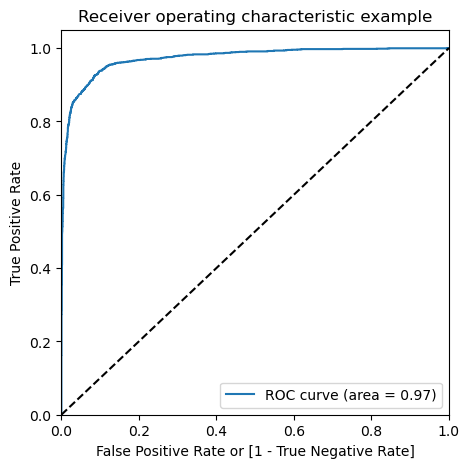

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.### 

#### Choosing the cutoff

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.090089         6071          0    1    0    0    0    0   
1          0        0.003640         5188          0    1    0    0    0    0   
2          1        0.987056         1180          1    1    1    1    1    1   
3          0        0.118014         5563          0    1    1    0    0    0   
4          0        0.008999         6006          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    1    1    1    1    1  
3    0    0    0    0    0  
4    0    0    0    0    0

In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.368388  1.000000  0.000000
0.1   0.1  0.855005  0.967963  0.789122
0.2   0.2  0.909378  0.943936  0.889223
0.3   0.3  0.918440  0.926201  0.913914
0.4   0.4  0.919916  0.898169  0.932599
0.5   0.5  0.924341  0.867277  0.957624
0.6   0.6  0.924763  0.844966  0.971305
0.7   0.7  0.919916  0.820938  0.977644
0.8   0.8  0.910011  0.784897  0.982983
0.9   0.9  0.884510  0.702517  0.990657


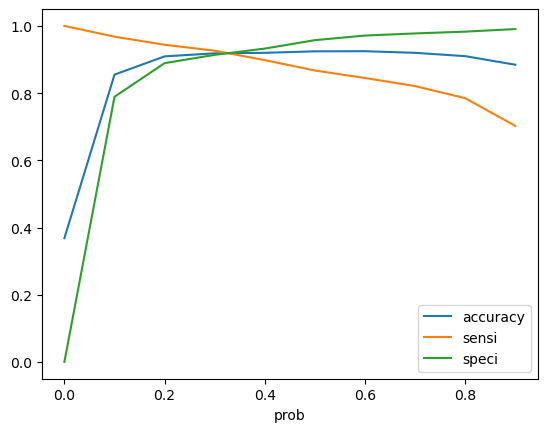

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [136]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.090089         6071          0    1    0    0    0    0   
1          0        0.003640         5188          0    1    0    0    0    0   
2          1        0.987056         1180          1    1    1    1    1    1   
3          0        0.118014         5563          0    1    1    0    0    0   
4          0        0.008999         6006          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    1    1    1    1    1                1  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [137]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob  Prospect ID  final_Predicted  Lead_Score
0          0        0.090089         6071                0           9
1          0        0.003640         5188                0           0
2          1        0.987056         1180                1          99
3          0        0.118014         5563                0          12
4          0        0.008999         6006                0           1

In [138]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9184404636459431

In [139]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2739,  258],
       [ 129, 1619]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9262013729977117

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.913913913913914

Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:


Accuracy : 90.81%

Sensitivity : 92.05%

Specificity : 90.23%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [143]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.08608608608608609


In [144]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8625466169419286


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9550209205020921


In [146]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2739,  258],
       [ 129, 1619]], dtype=int64)

In [147]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8625466169419286

In [148]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9262013729977117

In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8625466169419286

In [151]:

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9262013729977117

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

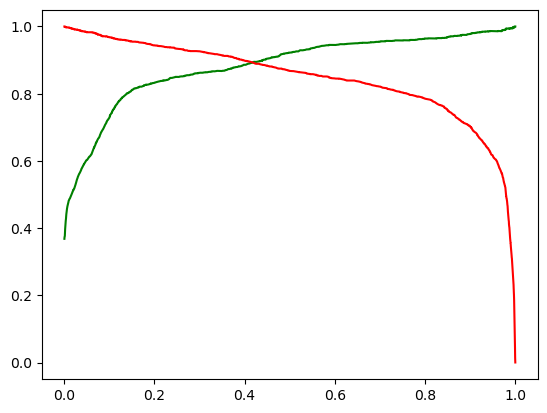

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### we will do the prediction on the test dataset

In [155]:
y_test_pred = lgm6.predict(X_test_sm)

In [156]:
y_test_pred[:10]

141     0.091220
3666    0.082339
8605    0.002369
4158    0.881137
7687    0.012090
627     0.075402
4730    0.001036
5776    0.094190
785     0.895812
2807    0.319152
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
# Let's see the head
y_pred_1.head()

0
141   0.091220
3666  0.082339
8605  0.002369
4158  0.881137
7687  0.012090

In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
y_pred_final.head()

Converted  Prospect ID         0
0          0          141  0.091220
1          0         3666  0.082339
2          0         8605  0.002369
3          1         4158  0.881137
4          0         7687  0.012090

In [164]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [165]:
y_pred_final.head()

Converted  Prospect ID  Converted_prob
0          0          141        0.091220
1          0         3666        0.082339
2          0         8605        0.002369
3          1         4158        0.881137
4          0         7687        0.012090

In [166]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [167]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score
0          141          0        0.091220           9
1         3666          0        0.082339           8
2         8605          0        0.002369           0
3         4158          1        0.881137          88
4         7687          0        0.012090           1

In [168]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [169]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score  final_Predicted
0          141          0        0.091220           9                0
1         3666          0        0.082339           8                0
2         8605          0        0.002369           0                0
3         4158          1        0.881137          88                1
4         7687          0        0.012090           1                0

In [170]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9164208456243854

In [171]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1184,  113],
       [  57,  680]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9226594301221167

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.912875867386276

In [175]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8575031525851198

In [176]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9226594301221167

Observations:
    
After running the model on the Test Data these are the figures we obtain:
    

Accuracy : 90.92%
    
Sensitivity : 91.41%
    
Specificity : 90.62%
    
    
Final Observation:
    
comparing the values obtained for Train & Test:
    

Train Data:
    
Accuracy : 90.81%

Sensitivity : 92.05%

Specificity : 90.10%
    
Test Data: 
    
Accuracy : 90.92%
    
Sensitivity : 91.41%
    
Specificity : 90.62%

Final conclusion from the logistic regression model:
    
- The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model
-  The final model has Sensitivity of 0.91, this means the model is able to predict 91% customers out of all the converted customers, (Positive conversion) correctly.
- While we have checked both Sensitivity-Specificity we have considered the for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 90%, 91% and 90% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 90%
- Hence overall this model seems to be good. 

In [177]:
#  1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

# From our model we can see that Tags_Lost to EINS, What is your current occupation_Working Professional
#Total Time Spent on Website

In [178]:
# 2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

#Tags_Lost to EINS
#Tags_Interested in other courses
#Last Activity_Email Bounced	all these variables has low VIF

In [179]:
# 3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.



In [180]:
# 4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

